# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('demo01.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

In [5]:
df.head(5)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [6]:
df.isna().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

In [7]:
print(f"Soma: {df['mau'].sum()}")
print(f'Shape: {df.shape}')


Soma: 390
Shape: (16650, 16)


In [8]:
print(f"{df['mau'].value_counts()}")

mau
False    16260
True       390
Name: count, dtype: int64


<Axes: xlabel='mau'>

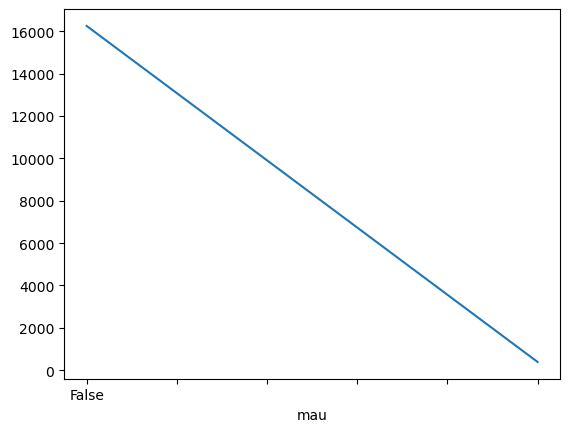

In [9]:
df_mau = df.groupby('mau')['mau'].count()
df_mau.plot(y ='quantidade')

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável.
    Dica:
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis,
        3. conte o número de categorias dessa variável
        4. acumule essa informação de 3. na lista que você criou em 1.
        5. No final, essa lista pode ser atribuída à nossa variável.

In [10]:
colunas = df.columns.to_list()

df_cat = list(map(lambda x: df[x].dtype, colunas))
df_cat = pd.DataFrame(df_cat, index=colunas, columns=['type'])
df_cat

,type
sexo,object
posse_de_veiculo,object
posse_de_imovel,object
qtd_filhos,int64
tipo_renda,object
educacao,object
estado_civil,object
tipo_residencia,object
idade,float64
tempo_emprego,float64


In [12]:
df_val = list(map(lambda x: df[x].nunique(), colunas))
df_val = pd.DataFrame(df_val, index=colunas, columns=['cat_num'])
df_val

,cat_num
sexo,2
posse_de_veiculo,2
posse_de_imovel,2
qtd_filhos,8
tipo_renda,5
educacao,5
estado_civil,5
tipo_residencia,6
idade,5298
tempo_emprego,3005


In [13]:
df_meta = pd.concat([df_val, df_cat], axis=1)
df_meta

,cat_num,type
sexo,2,object
posse_de_veiculo,2,object
posse_de_imovel,2,object
qtd_filhos,8,int64
tipo_renda,5,object
educacao,5,object
estado_civil,5,object
tipo_residencia,6,object
idade,5298,float64
tempo_emprego,3005,float64


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [14]:
df.head(5)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [15]:
df.sexo = df.sexo.map({'F':0, 'M':1})
df.sexo.head()

0    1
1    0
2    0
3    1
4    0
Name: sexo, dtype: int64

In [16]:
df.posse_de_veiculo = df.posse_de_veiculo.map({'N':0, 'Y':1})
df.posse_de_veiculo.head()

0    1
1    0
2    0
3    1
4    1
Name: posse_de_veiculo, dtype: int64

In [17]:
df.posse_de_imovel = df.posse_de_imovel.map({'N':0, 'Y':1})
df.posse_de_imovel.head()

0    1
1    1
2    1
3    1
4    0
Name: posse_de_imovel, dtype: int64

In [18]:
df['mau'] = df['mau'].astype(int)

In [20]:
df.dtypes

sexo                       int64
posse_de_veiculo           int64
posse_de_imovel            int64
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                        int32
dtype: object

In [21]:
df_dum = pd.get_dummies(df, columns=colunas[4:8], drop_first=True)
df_dum.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,1,1,1,0,58.832877,3.106849,1,0,0,0,...,True,True,False,False,False,True,False,False,False,False
1,0,0,1,0,52.356164,8.358904,1,0,1,1,...,True,False,False,True,False,True,False,False,False,False
2,0,0,1,0,52.356164,8.358904,1,0,1,1,...,True,False,False,True,False,True,False,False,False,False
3,1,1,1,0,46.224658,2.106849,1,1,1,1,...,False,True,False,False,False,True,False,False,False,False
4,0,1,0,0,29.230137,3.021918,1,0,0,0,...,False,True,False,False,False,True,False,False,False,False


In [22]:
df.dtypes

sexo                       int64
posse_de_veiculo           int64
posse_de_imovel            int64
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                        int32
dtype: object

#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [23]:
df['mau'].value_counts()

mau
0    16260
1      390
Name: count, dtype: int64

In [24]:
df_cruzado_veiculo = pd.crosstab(df['posse_de_veiculo'], df['mau'])
df_cruzado_veiculo

mau,0,1
posse_de_veiculo,,
0,9931,247
1,6329,143


In [25]:
df_cruzado_email = pd.crosstab(df['possui_email'], df['mau'])
df_cruzado_email

mau,0,1
possui_email,,
0,14810,360
1,1450,30


#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [28]:
df_dum.to_csv('Mod07_Tarefa_01 (1).csv')